# [Lab Session 1](sobel.ipynb)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 2.1.]()** Load and show the image:

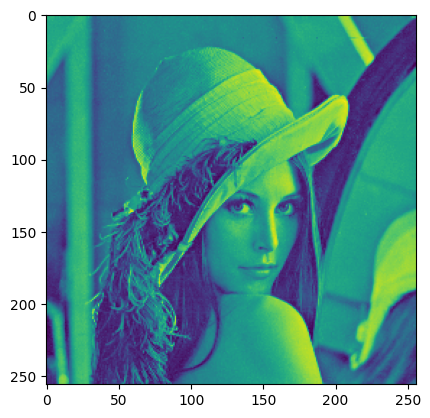

In [3]:
lena = plt.imread('data/lena.png')
plt.imshow(lena)

**[Task 2.2.]()** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical $3 \times 3$ Sobel filtering, respectively:

In [4]:
def sobel_h(img):
    img_h = img.copy()    
    result = np.zeros(img_h.shape)
    size = 3
    n = (size - 1) // 2
    for p in np.ndindex(img_h.shape):
        neighborhood_sum = 0
        r = p[0]
        c = p[1]
        if r >= (0+n) and c >= (0+n) and r < (img_h.shape[0]-n) and c < (img_h.shape[1]-n):
            for q in np.ndindex(size, size):
                r2 = p[0]+q[0]-n
                c2 = p[1]+q[1]-n
                if q[1] == 0:
                    if q[0] == 1:
                        neighborhood_sum -= 2*img_h[r2, c2]
                    else:
                        neighborhood_sum -= img_h[r2, c2]
                elif q[1] == size-1:
                    if q[0] == 1:
                        neighborhood_sum += 2*img_h[r2, c2]
                    else:
                        neighborhood_sum += img_h[r2, c2]
        result[r, c] = (neighborhood_sum)/(8)
    
    return result

def sobel_v(img):
    img_v = img.copy() 
    result = np.zeros(img_v.shape)
    size = 3
    n = (size - 1) // 2
    for p in np.ndindex(img_v.shape):
        neighborhood_sum = 0
        r = p[0]
        c = p[1]
        if r >= (0+n) and c >= (0+n) and r < (img_v.shape[0]-n) and c < (img_v.shape[1]-n):
            for q in np.ndindex(size, size):
                r2 = p[0]+q[0]-n
                c2 = p[1]+q[1]-n
                if q[0] == 0:
                    if q[1] == 1:
                        neighborhood_sum -= 2*img_v[r2, c2]
                    else:
                        neighborhood_sum -= img_v[r2, c2]
                elif q[0] == size-1:
                    if q[1] == 1:
                        neighborhood_sum += 2*img_v[r2, c2]
                    else:
                        neighborhood_sum += img_v[r2, c2]
        result[r, c] = (neighborhood_sum)/(8)
    
    return result

**[Task 2.3.]()** Test your implementations from above:

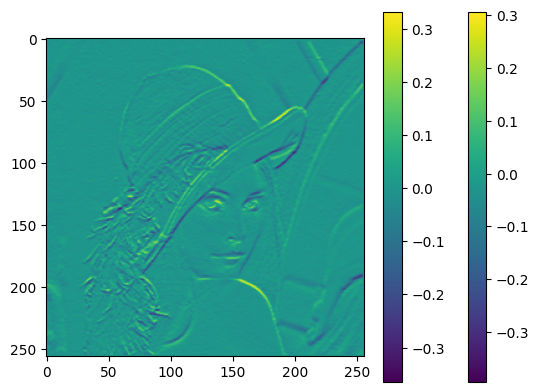

In [5]:
sobh = sobel_h(lena)
plt.imshow(sobh)
plt.colorbar()

sobv = sobel_v(lena)
plt.imshow(sobv)
plt.colorbar()

**[Task 2.4.]()** Compute the image gradient magnitude:

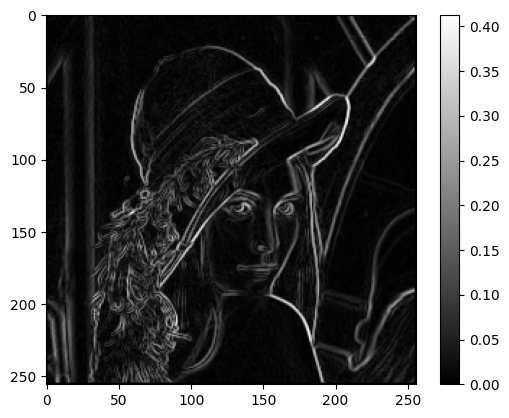

In [6]:
gx = sobel_h(lena)

gy = sobel_v(lena)

gradient_magnitude = np.sqrt(gx**2 + gy**2)

plt.imshow(gradient_magnitude, cmap='gray')

plt.colorbar()
